# Kelompok 5
## beranggotakan

1.   Rizal Mujahiddan (G64190069)
2.   Nisma Karmiahtun F (G64190036)
3.   Dhiya Ulayya Tsabitah (G1401201013)
4.   Muhammad Nachnoer Novatron Fitra Arss (G1401201014)



Install package

In [46]:
install.packages("qqplotr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Download filenya

In [48]:
url <- "https://docs.google.com/uc?id=1ebsw2GaAK9HdyrGyzCCYb7s7eyQ4-fJM&export=downloads"
download.file(url,"Data untuk Eksplorasi.xlsx")

##Dilakukanlah uji formal

In [49]:
library(readxl)
Datasheet1 <- read_excel("Data untuk Eksplorasi.xlsx", skip = 1)
View(Datasheet1)
Datasheet3 <- read_excel("Data untuk Eksplorasi.xlsx", sheet = 3, skip = 2)
colnames(Datasheet3)[2]<-c("Country") 
DataGabungan <- merge(Datasheet3, Datasheet1, by = "Country")
DataFix <- DataGabungan[,c(-3:-5,-8:-11)]

var1<- na.omit(DataFix$`Real GDP growth ( avg last 5yrs%)`)
var2<- na.omit(DataFix$`Loan-deposit ratio (%)`)

Country,GDP (USDbn),Real GDP growth ( avg last 5yrs%),Real GDP growth (%),Consumer prices ( avg annual avg. % growth 5yrs),Consumer prices (annual avg. % growth),Gross dom. inv. (% GDP avg 5yrs),Gross dom. inv. (% GDP),Gross dom. svg. (% GDP avg 5yrs),Gross dom. svg. (% GDP),⋯,Unemployment (% labour force avg 5yr),Unemployment (% labour force),Pol. Stab.,Gov. Eff.,Rule of Law,Ctrl. of Corr.,Reg. Qual.,Voice & Acc-ty,HDI,Ease of DB (p-tile)f
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
CH,749.01767,1.88522,-2.7232,0.00116,-0.0084,24.41888,24.5284,36.53670,37.0514,⋯,2.88574,3.1728,94.76190,99.51923,99.03846,96.15385,94.71154,97.04433,98.9,81.5
DE,3793.59316,1.62892,-4.7654,1.20768,0.3778,20.71144,20.2475,27.49714,25.9843,⋯,3.73164,4.8177,66.66666,93.26923,92.30769,95.19231,96.15385,95.07389,97.3,88.9
DK,355.18403,2.68708,-2.7333,0.54000,0.3000,22.06322,23.1748,28.83828,29.6644,⋯,5.50000,5.4000,83.80952,99.03846,98.07692,97.59615,92.30769,98.52217,95.2,98.5
LU,73.05537,3.22626,-1.3139,1.17428,0.4000,18.38978,15.7027,53.66792,54.4877,⋯,5.96668,6.8000,95.71429,95.67308,95.67308,98.07692,95.19231,96.55173,87.7,62.5
NL,910.00559,2.21984,-3.7396,1.17730,1.1124,21.16826,21.3760,31.05400,31.9720,⋯,4.39000,4.6000,75.71429,96.63461,96.15385,96.63461,98.07692,97.53695,95.7,78.4
NO,362.57112,1.46654,-0.7659,2.61900,1.1658,28.22544,30.0768,31.95034,29.6328,⋯,4.18500,4.2000,92.38095,97.59615,99.51923,97.11539,97.11539,100.00000,100,95.8
SE,537.60987,2.47168,-2.8178,1.62000,0.5000,25.11320,24.5183,28.27044,28.8994,⋯,7.02600,8.6000,86.66666,97.11539,98.55769,98.55769,96.63461,99.50739,96.8,95.3
US,20935.00000,2.45554,-3.5005,1.55316,1.2366,17.40650,17.2080,14.55284,14.1275,⋯,4.98166,5.6146,57.61905,91.34615,89.90385,84.61539,88.94231,78.81773,91.4,97.4
AU,1359.13285,2.44592,-2.3597,1.65124,0.8469,24.28828,22.2838,24.71486,25.8262,⋯,5.65168,5.4478,88.57143,92.78846,93.26923,94.23077,98.55769,93.10345,95.7,93.2


In [50]:
#kolmogorof-smirnov test
#normal
set.seed(42); ks.test(var1, "pnorm", mean(var1), sd(var1))


	One-sample Kolmogorov-Smirnov test

data:  var1
D = 0.06184, p-value = 0.7714
alternative hypothesis: two-sided


In [51]:
#log normal
set.seed(42); ks.test(var1, "plnorm", mean(log(var1)), sd(log(var1)))

Warning message in log(var1):
“NaNs produced”
Warning message in log(var1):
“NaNs produced”



	One-sample Kolmogorov-Smirnov test

data:  var1
D = NA, p-value = NA
alternative hypothesis: two-sided


In [52]:
#chi-squares
set.seed(42); ks.test(var1, "pchisq", mean(var1))


	One-sample Kolmogorov-Smirnov test

data:  var1
D = 0.12779, p-value = 0.04675
alternative hypothesis: two-sided


In [53]:
#eksponential
set.seed(42); ks.test(log(var1), "pexp", 1/mean(var1))

Warning message in log(var1):
“NaNs produced”



	One-sample Kolmogorov-Smirnov test

data:  log(var1)
D = 0.50442, p-value < 2.2e-16
alternative hypothesis: two-sided


##plot histogram

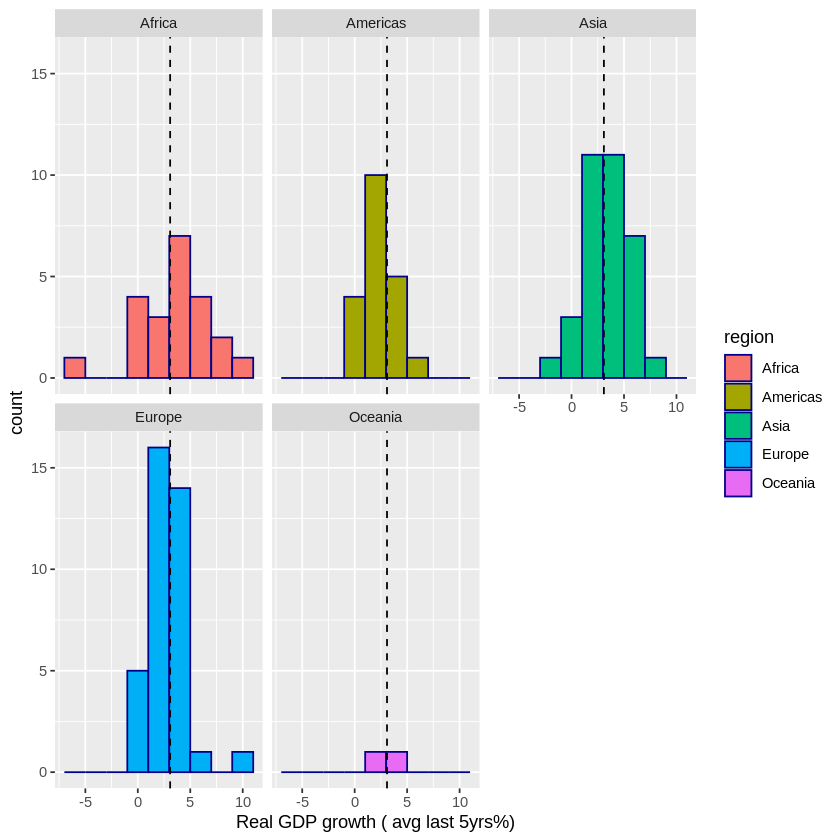

In [54]:
library(ggplot2)
sheet1 <- read_excel("Data untuk Eksplorasi.xlsx", skip = 1)
sheet3 <- read_excel("Data untuk Eksplorasi.xlsx", sheet="country code", skip=2)
colnames(sheet3)[2] <- c("Country")
sheet_gab <- merge(sheet1, sheet3, by = "Country");
ggplot(sheet_gab, aes(x=`Real GDP growth ( avg last 5yrs%)`,fill=`region`)) + 
  geom_histogram(binwidth = 2, color="darkblue") + facet_wrap(~`region`)+
  geom_vline(aes(xintercept=mean(`Real GDP growth ( avg last 5yrs%)`)), color="black",
             linetype="dashed", size=0.5)

Warning message:
“Removed 9 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 115 rows containing missing values (geom_vline).”


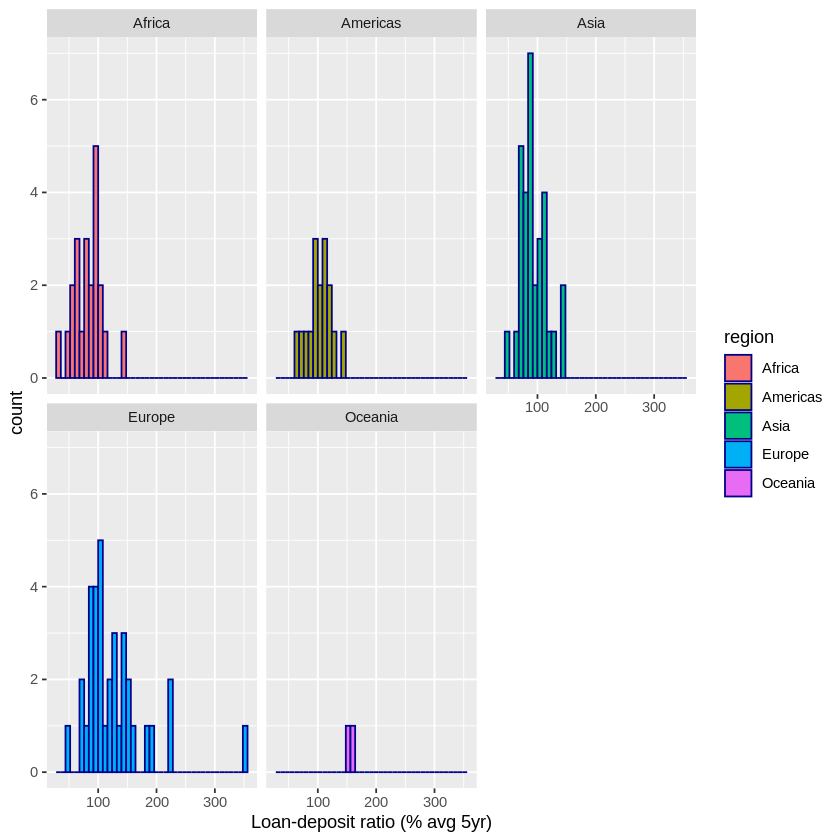

In [55]:
ggplot(sheet_gab, aes(x=`Loan-deposit ratio (% avg 5yr)`,fill=`region`)) + 
  geom_histogram(binwidth = 8, color="darkblue") + facet_wrap(~`region`)+
  geom_vline(aes(xintercept=mean(`Loan-deposit ratio (% avg 5yr)`)), color="black",
             linetype="dashed", size=0.5)

## plot qqplot

In [56]:
library(readxl)
library(dplyr)
library(ggplot2)
library(qqplotr)

metadata <- read_xlsx("Data untuk Eksplorasi.xlsx",
                      sheet="penjelasan peubah",range="B2:F38",col_names=FALSE)
colnames(metadata) <- c("var","nama","arti","sistem","sumber data")

Sheet1 <- read_excel("Data untuk Eksplorasi.xlsx", skip=1)
Sheet3 <- read_excel("Data untuk Eksplorasi.xlsx", 
                     sheet="country code", skip=2)


colnames(Sheet3)[2]<-c("Country");Sheet3
Sheet13 <- merge(Sheet3, Sheet1, by="Country");Sh13<-Sheet13[,c(-3:-5,-8:-11)]

s13<- Sh13%>%filter(region=="Asia")
S13 <- Sh13%>%arrange(region,`sub-region`);S13
p<-as.factor(S13$`sub-region`);p
S13$HDI <- as.numeric(S13$HDI)
S13$`sub-region`<-factor(p, levels=c("Central Asia", "Eastern Asia", "Southern Asia",
                                     "South-eastern Asia", "Western Asia",
                                     "Northern Africa", "Sub-Saharan Africa",
                                     "Eastern Europe","Northern Europe","Southern Europe",
                                     "Western Europe","Latin America and the Caribbean", 
                                     "Northern America", "Australia and New Zealand"))

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5



name,Country,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NA,142,34,NA
Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NA,150,154,NA
Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NA,150,39,NA
Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NA,2,15,NA
American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NA,9,61,NA
Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,NA,150,39,NA
Angola,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2,202,17
Anguilla,AI,AIA,660,ISO 3166-2:AI,Americas,Latin America and the Caribbean,Caribbean,19,419,29
Antarctica,AQ,ATA,10,ISO 3166-2:AQ,NA,NA,NA,NA,NA,NA


Country,name,region,sub-region,GDP (USDbn),Real GDP growth ( avg last 5yrs%),Real GDP growth (%),Consumer prices ( avg annual avg. % growth 5yrs),Consumer prices (annual avg. % growth),Gross dom. inv. (% GDP avg 5yrs),⋯,Unemployment (% labour force avg 5yr),Unemployment (% labour force),Pol. Stab.,Gov. Eff.,Rule of Law,Ctrl. of Corr.,Reg. Qual.,Voice & Acc-ty,HDI,Ease of DB (p-tile)f
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
EG,Egypt,Africa,Northern Africa,361.845786,4.44796,3.5697,16.16054,5.2996,15.78406,⋯,10.29600,7.0000,12.857142,36.538460,37.98077,27.88461,18.750000,8.374384,38.8,40.3
MA,Morocco,Africa,Northern Africa,112.869983,3.09514,-7.1172,1.18800,0.6200,32.29572,⋯,10.04000,11.5000,32.380951,47.596153,48.55769,45.67308,46.153847,29.556650,36.1,72.5
TN,Tunisia,Africa,Northern Africa,39.218118,1.60820,-8.8124,5.55600,7.7300,18.80654,⋯,15.62500,17.0000,17.142857,48.557693,55.76923,52.88462,35.576923,56.650246,49.4,59.3
AO,Angola,Africa,Sub-Saharan Africa,62.485865,-0.87800,-3.9750,22.35646,21.8290,NA,⋯,8.88600,10.5000,35.238094,12.980769,13.46154,13.94231,16.346153,25.615763,21.8,6.9
BJ,Benin,Africa,Sub-Saharan Africa,15.355253,4.87736,2.3000,0.22520,3.0561,23.40036,⋯,2.30000,2.3000,34.285713,36.057693,26.92308,42.78846,37.500000,50.246304,16.4,21.7
CG,Congo,Africa,Sub-Saharan Africa,9.707663,-5.13500,-5.6000,2.03374,1.8177,46.82746,⋯,NA,NA,16.190475,8.173077,10.09615,6.25000,8.173077,14.285714,21.2,5.3
CI,Côte d'Ivoire,Africa,Sub-Saharan Africa,61.348608,7.29640,1.8000,0.75212,0.8000,20.82476,⋯,10.44000,12.0000,14.285714,35.096153,30.76923,33.65385,43.269230,37.438423,14.3,42.4
CM,Cameroon,Africa,Sub-Saharan Africa,40.349134,4.35350,0.6920,1.54052,2.4449,28.82414,⋯,NA,NA,8.095238,19.230770,11.53846,11.05769,19.230770,16.256157,19.1,12.2
CV,Cabo Verde,Africa,Sub-Saharan Africa,1.703701,3.92138,-14.8000,0.37920,0.6000,35.67148,⋯,13.24000,15.8000,78.095238,63.461540,69.71154,79.80769,44.711540,79.310349,33.5,28.1


[1] Northern Africa                 Northern Africa                
  [3] Northern Africa                 Sub-Saharan Africa             
  [5] Sub-Saharan Africa              Sub-Saharan Africa             
  [7] Sub-Saharan Africa              Sub-Saharan Africa             
  [9] Sub-Saharan Africa              Sub-Saharan Africa             
 [11] Sub-Saharan Africa              Sub-Saharan Africa             
 [13] Sub-Saharan Africa              Sub-Saharan Africa             
 [15] Sub-Saharan Africa              Sub-Saharan Africa             
 [17] Sub-Saharan Africa              Sub-Saharan Africa             
 [19] Sub-Saharan Africa              Sub-Saharan Africa             
 [21] Sub-Saharan Africa              Sub-Saharan Africa             
 [23] Latin America and the Caribbean Latin America and the Caribbean
 [25] Latin America and the Caribbean Latin America and the Caribbean
 [27] Latin America and the Caribbean Latin America and the Caribbean
 [29] Latin America and the Caribbean Latin America and the Caribbean
 [31] Latin America and the Caribbean Latin America and the Caribbean
 [33] Latin America and the Caribbean Latin America and the Caribbean
 [35] Latin America and the Caribbean Latin America and the Caribbean
 [37] Latin America and the Caribbean Latin America and the Caribbean
 [39] Latin America and the Caribbean Latin America and the Caribbean
 [41] Northern America                Northern America               
 [43] Central Asia                    Central Asia                   
 [45] Eastern Asia                    Eastern Asia                   
 [47] Eastern Asia                    Eastern Asia                   
 [49] Eastern Asia                    Eastern Asia                   
 [51] Eastern Asia                    South-eastern Asia             
 [53] South-eastern Asia              South-eastern Asia             
 [55] South-eastern Asia              South-eastern Asia             
 [57] South-eastern Asia              Southern Asia                  
 [59] Southern Asia                   Southern Asia                  
 [61] Southern Asia                   Southern Asia                  
 [63] Western Asia                    Western Asia                   
 [65] Western Asia                    Western Asia                   
 [67] Western Asia                    Western Asia                   
 [69] Western Asia                    Western Asia                   
 [71] Western Asia                    Western Asia                   
 [73] Western Asia                    Western Asia                   
 [75] Western Asia                    Western Asia                   
 [77] Eastern Europe                  Eastern Europe                 
 [79] Eastern Europe                  Eastern Europe                 
 [81] Eastern Europe                  Eastern Europe                 
 [83] Eastern Europe                  Eastern Europe                 
 [85] Eastern Europe                  Northern Europe                
 [87] Northern Europe                 Northern Europe                
 [89] Northern Europe                 Northern Europe                
 [91] Northern Europe                 Northern Europe                
 [93] Northern Europe                 Northern Europe                
 [95] Northern Europe                 Southern Europe                
 [97] Southern Europe                 Southern Europe                
 [99] Southern Europe                 Southern Europe                
[101] Southern Europe                 Southern Europe                
[103] Southern Europe                 Southern Europe                
[105] Southern Europe                 Southern Europe                
[107] Western Europe                  Western Europe                 
[109] Western Europe                  Western Europe                 
[111] Western Europe                  Western Europe                 
[113] Western Europe                  Australia and New Zealand      
[115] Austra

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


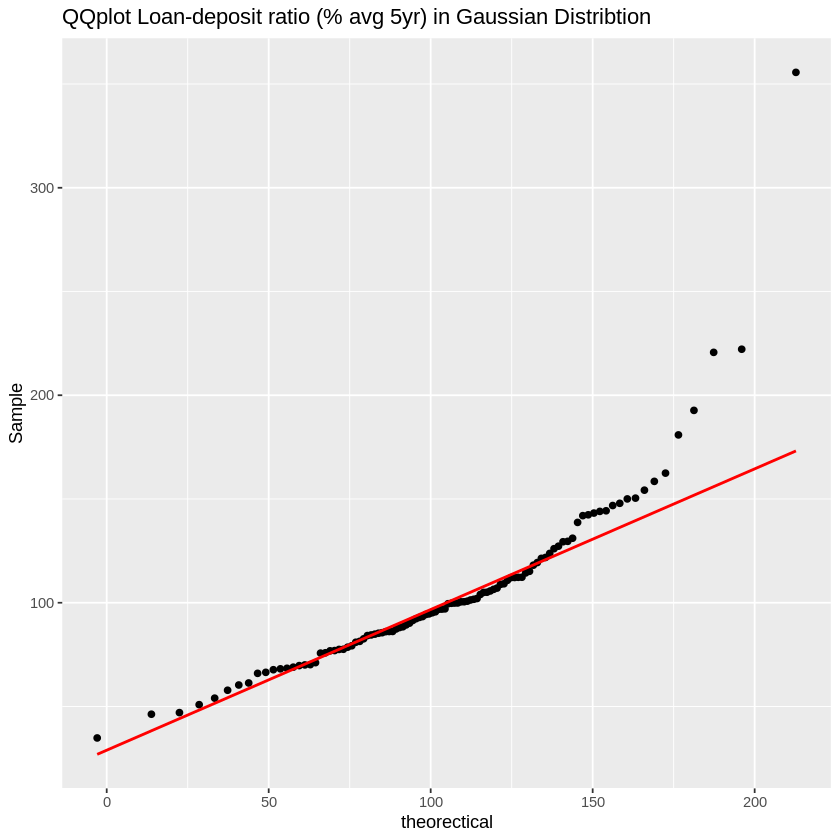

In [57]:
ggplot(S13, aes(sample = `Loan-deposit ratio (% avg 5yr)`)) + 
  stat_qq_point()+stat_qq_line(col="red")+
  labs(x="theorectical",y="Sample",
       title = "QQplot Loan-deposit ratio (% avg 5yr) in Gaussian Distribtion")

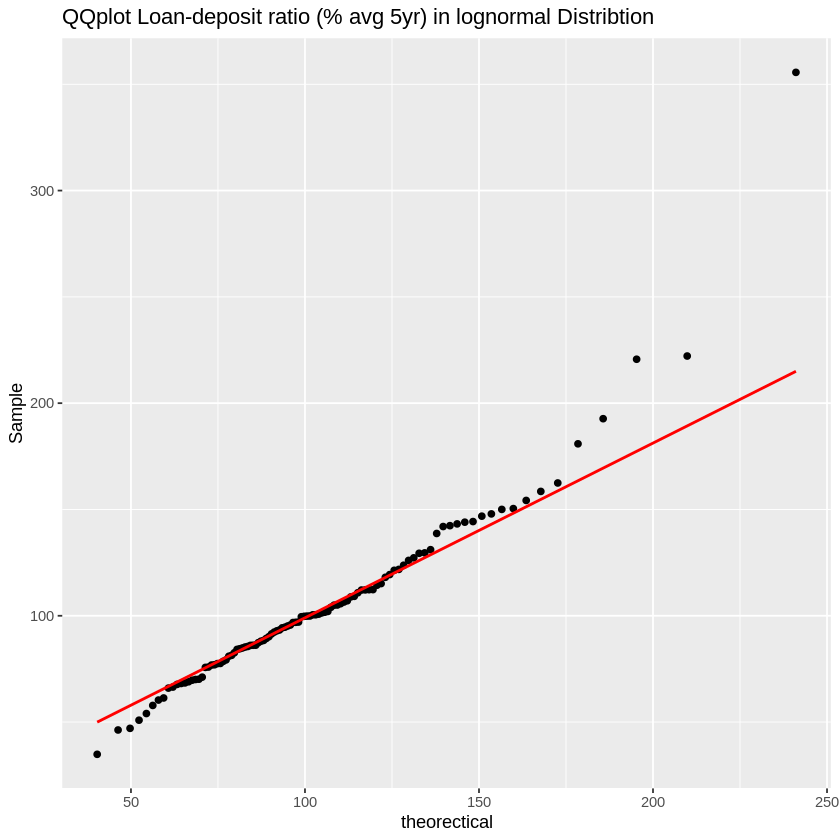

In [58]:
ggplot(S13, aes(sample = `Loan-deposit ratio (% avg 5yr)`)) + 
  stat_qq_point(distribution="lnorm")+  
  stat_qq_line(col="red",distribution = "lnorm")+
  labs(x="theorectical",y="Sample",
       title = "QQplot Loan-deposit ratio (% avg 5yr) in lognormal Distribtion")

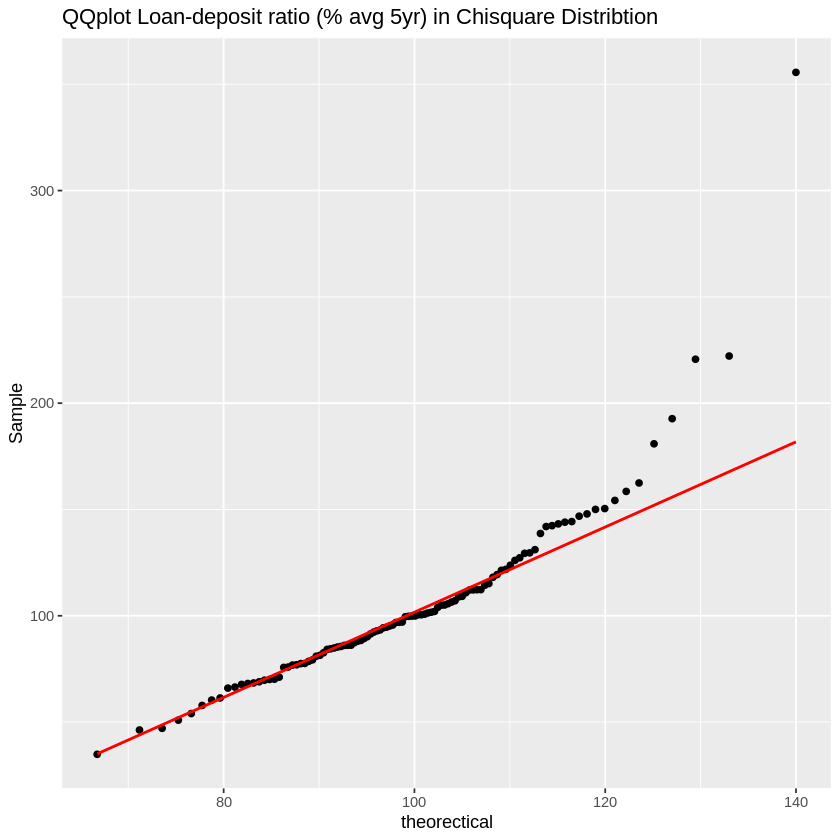

In [59]:
ggplot(S13, aes(sample = `Loan-deposit ratio (% avg 5yr)`)) + 
  stat_qq_point(distribution="chisq")+  
  stat_qq_line(col="red",distribution = "chisq")+
  labs(x="theorectical",y="Sample", 
       title = "QQplot Loan-deposit ratio (% avg 5yr) in Chisquare Distribtion")

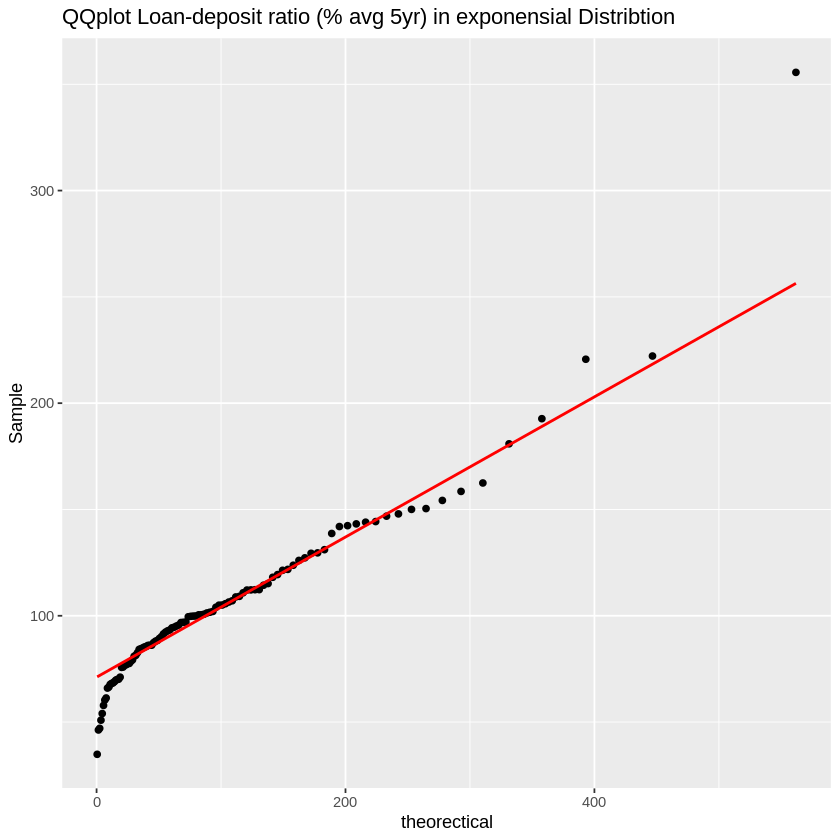

In [60]:
ggplot(S13, aes(sample = `Loan-deposit ratio (% avg 5yr)`)) + 
  stat_qq_point(distribution="exp")+
  stat_qq_line(col="red",distribution="exp")+
  labs(x="theorectical",y="Sample",
       title = "QQplot Loan-deposit ratio (% avg 5yr) in exponensial Distribtion")

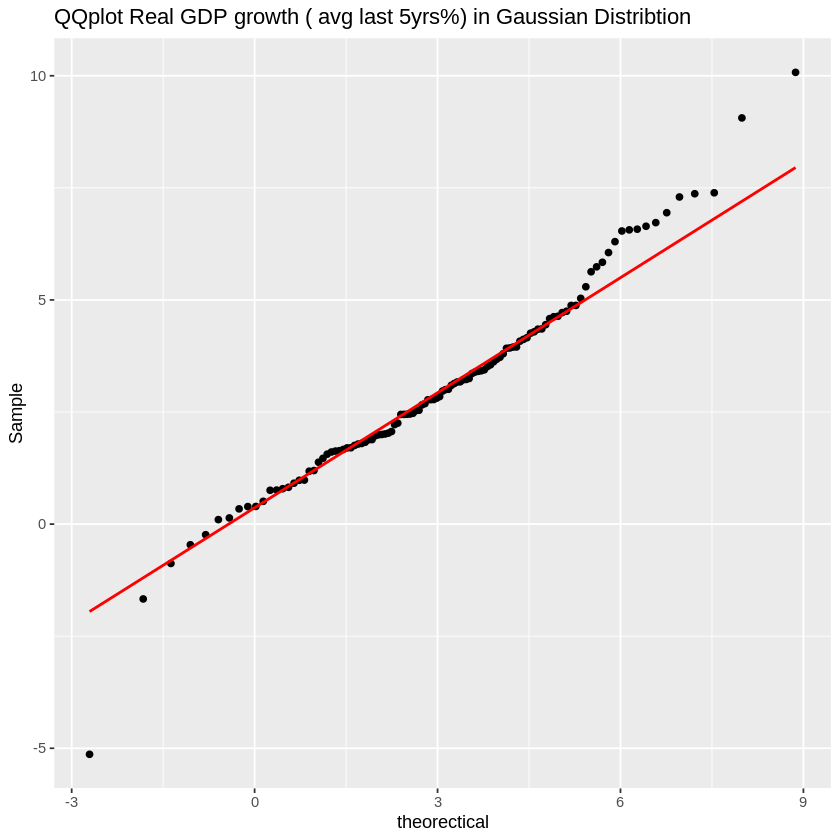

In [61]:
ggplot(S13, aes(sample = `Real GDP growth ( avg last 5yrs%)`)) + 
  stat_qq_point()+stat_qq_line(col="red")+
  labs(x="theorectical",y="Sample",
       title = "QQplot Real GDP growth ( avg last 5yrs%) in Gaussian Distribtion")


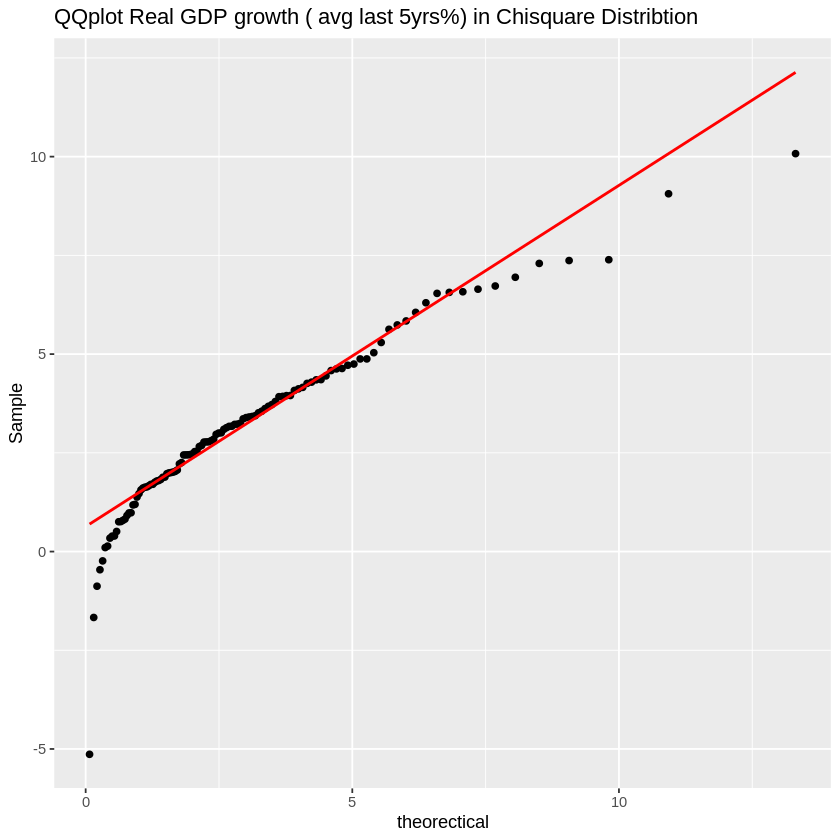

In [62]:
ggplot(S13, aes(sample = `Real GDP growth ( avg last 5yrs%)`)) + 
  stat_qq_point(distribution = "chisq",
                dparams = list(df = mean(S13$`Real GDP growth ( avg last 5yrs%)`)))+
  stat_qq_line(distribution = "chisq",col="red",
               dparams = list(df = mean(S13$`Real GDP growth ( avg last 5yrs%)`)))+
  labs(x="theorectical",y="Sample",
       title = "QQplot Real GDP growth ( avg last 5yrs%) in Chisquare Distribtion")


Warning message in log(S13$`Real GDP growth ( avg last 5yrs%)`):
“NaNs produced”
Warning message in log(S13$`Real GDP growth ( avg last 5yrs%)`):
“NaNs produced”


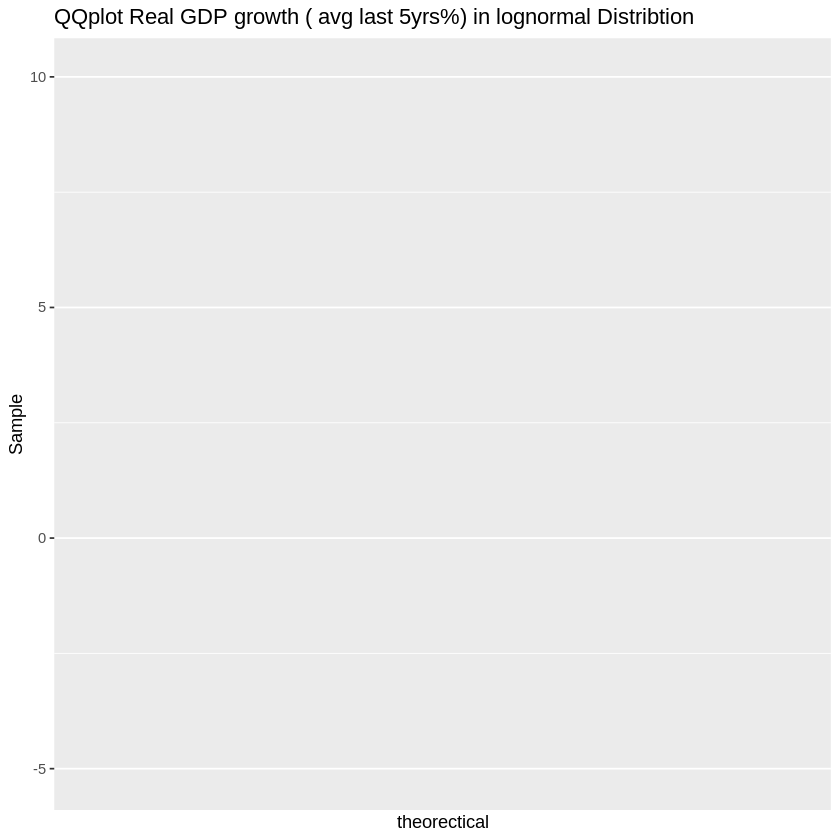

In [63]:
ggplot(S13, aes(sample = `Real GDP growth ( avg last 5yrs%)`)) + 
  stat_qq_point(distribution="lnorm",
                dparams=list(meanlog=mean(log(S13$`Real GDP growth ( avg last 5yrs%)`)),
                             sdlog = sd(log(S13$`Real GDP growth ( avg last 5yrs%)`))))+  
  labs(x="theorectical",y="Sample",
       title = "QQplot Real GDP growth ( avg last 5yrs%) in lognormal Distribtion")


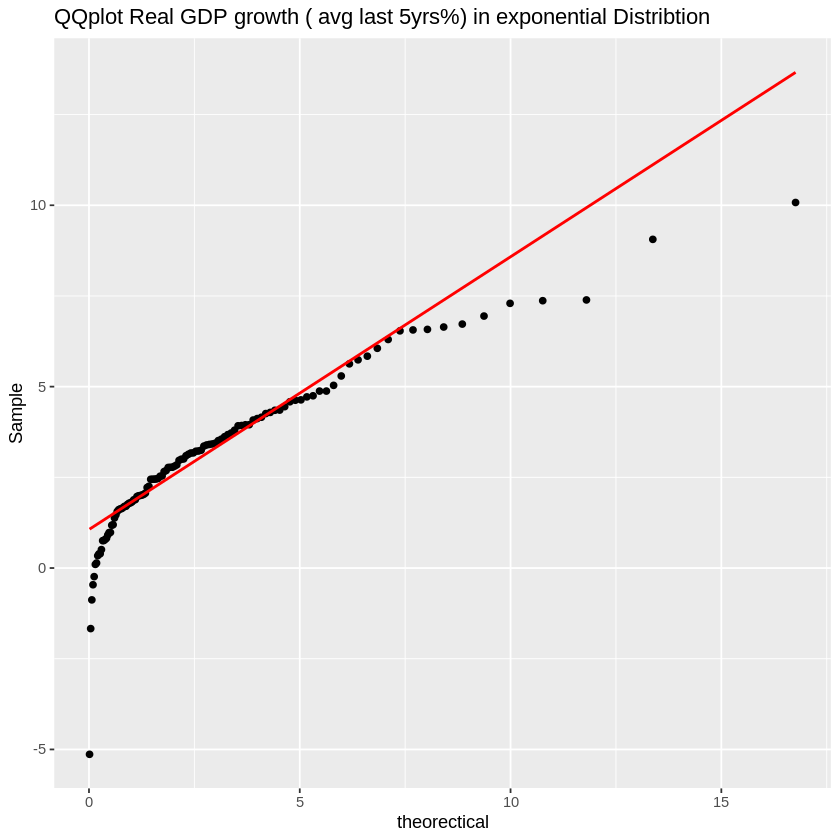

In [64]:
ggplot(S13, aes(sample = `Real GDP growth ( avg last 5yrs%)`)) + 
  stat_qq_point(distribution="exp",
                dparams=list(rate=1/mean(S13$`Real GDP growth ( avg last 5yrs%)`)))+  
  stat_qq_line(col="red",distribution = "exp",
               dparams = list(rate=1/mean(S13$`Real GDP growth ( avg last 5yrs%)`)))+
  labs(x="theorectical",y="Sample",
       title = "QQplot Real GDP growth ( avg last 5yrs%) in exponential Distribtion")


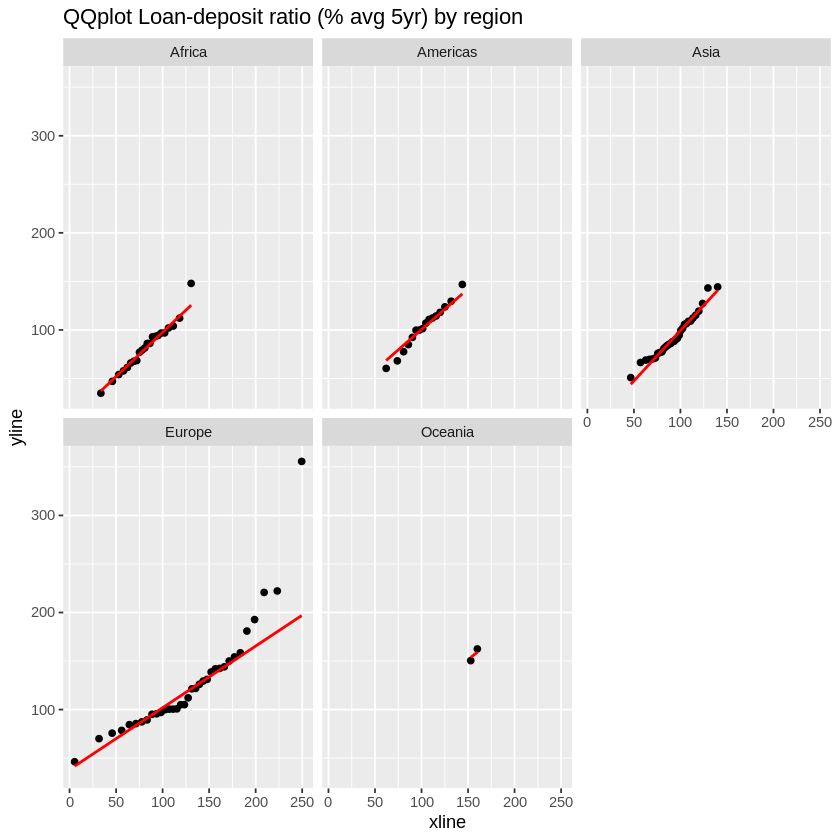

In [65]:
ggplot(S13, aes(sample = `Loan-deposit ratio (% avg 5yr)`)) + 
  stat_qq_point() + stat_qq_line(col="red") + 
  facet_wrap(~`region`)+
  labs(title = "QQplot Loan-deposit ratio (% avg 5yr) by region")


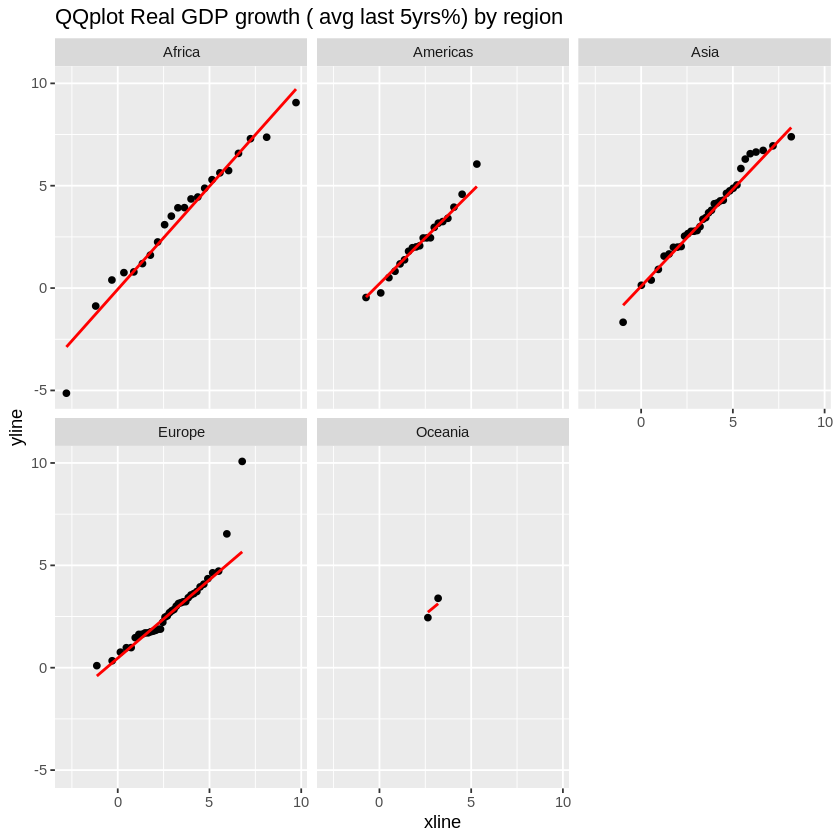

In [66]:
ggplot(S13, aes(sample = `Real GDP growth ( avg last 5yrs%)`)) + 
  stat_qq_point() + stat_qq_line(col="red") + 
  facet_wrap(~`region`)+
  labs(title = "QQplot Real GDP growth ( avg last 5yrs%) by region")

## plot boxplot

Warning message:
“Removed 5 rows containing missing values (geom_segment).”


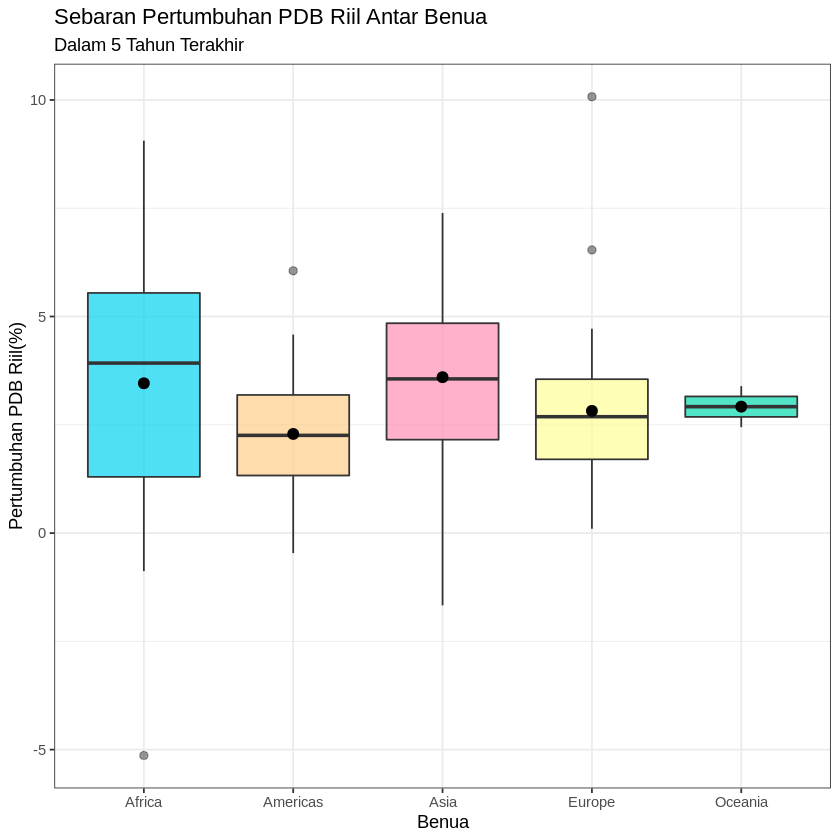

In [67]:
ggplot(S13, mapping=aes(x=`Real GDP growth ( avg last 5yrs%)`, y=region))+
  geom_boxplot(alpha=0.7, fill=c("#03d3f2", "#ffcd88", "#ff8fb4","#fffe98","#06d8ae"),
  outlier.fill = "#fd7576", outlier.size=1.96, outlier.alpha=0.5, shape=8)+ 
  labs(title="Sebaran Pertumbuhan PDB Riil Antar Benua",subtitle="Dalam 5 Tahun Terakhir", 
        x="Pertumbuhan PDB Riil(%)", y="Benua")+
  theme_bw()+coord_flip()+stat_summary(fun="mean")

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 9 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 5 rows containing missing values (geom_segment).”


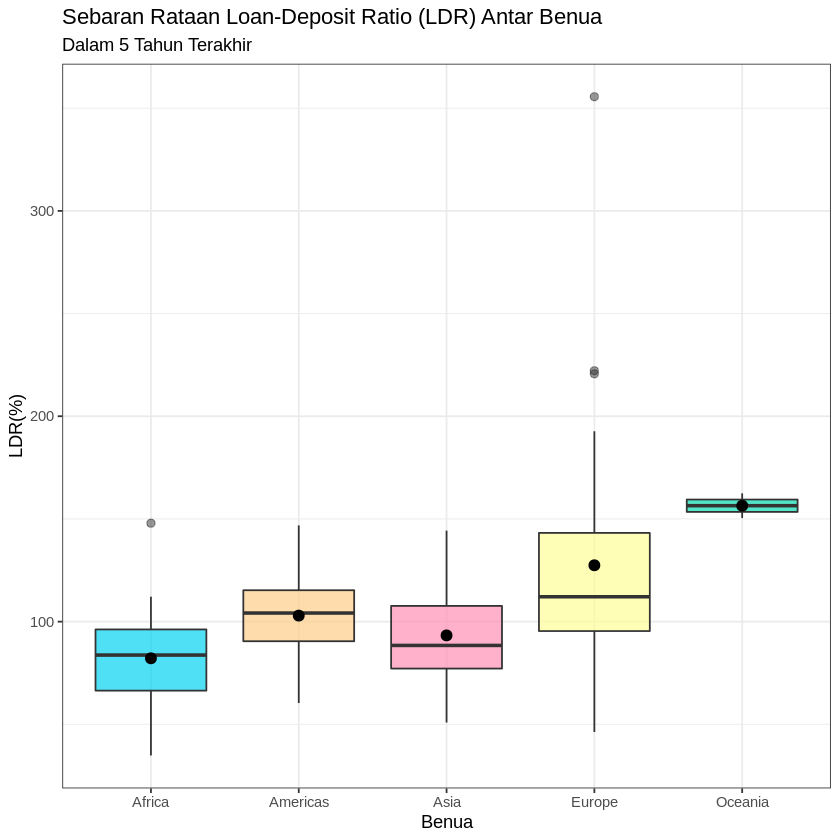

In [69]:
ggplot(S13, mapping=aes(x=`Loan-deposit ratio (% avg 5yr)`, y=region))+
geom_boxplot(alpha=0.7, fill=c("#03d3f2", "#ffcd88", "#ff8fb4","#fffe98","#06d8ae"),
outlier.fill = "#fd7576", outlier.size=1.96, outlier.alpha=0.5, shape=8)+ 
  labs(title="Sebaran Rataan Loan-Deposit Ratio (LDR) Antar Benua", 
  subtitle="Dalam 5 Tahun Terakhir", x="LDR(%)", y="Benua")+
  theme_bw()+coord_flip()+stat_summary(fun="mean")